# Calculo solución ecuaciones de un Péndulo, utilizando diferentes solvers.

### Las ecuaciones del pendulo son las siguientes:
## $\ddot{\theta}*L + g*sin(\theta) = u$

## $\ddot{\theta}= (\frac{-g}{L})* sin(\theta) + (1/L)*u$

### Now we pass to the state space, where:
$\theta = x$  Angular position

$\dot{\theta}= \dot{x}$ Angular velocity,  State 1

$\ddot{\theta}= (\frac{-g}{L})* sin(\theta) + (1/L)*u$ Aceleration angular,  State 2

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### We define a function that have position, velocity and control signals, as inputs. 

### This function returns  velocity and aceleration, making use of the model equations.

In [2]:
# Define the model equations or system dynamics
def model_equations(x, u):
                       # u -> control input (torque)
    L = 1.0            # Length of the pendulum arm
    g = 9.81           # Acceleration due to gravity
    theta = x[0]       # theta (angle)
    theta_dot = x[1]   # theta_dot (angular velocity)

    theta_ddot = (-g / L) * np.sin(theta) + (1 / L) * u
    return np.array([theta_dot, theta_ddot])

In [3]:
# Simulation parameters
dt = 0.001                     # Time step
t_sim = np.arange(0, 20, dt)    # Simulation time array

# Initial conditions
x0 = np.array([np.pi / 4, 0])   # Initial angle and angular velocity

# Control input 
u = np.zeros_like(t_sim)        # Zero control input for simplicity

x_sim = np.zeros((len(t_sim), len(x0)))  # fill solution vector  with zeros
x_sim[0] = x0                            # Initial conditions asigned to solution vector.

In [4]:
t_sim

array([0.0000e+00, 1.0000e-03, 2.0000e-03, ..., 1.9997e+01, 1.9998e+01,
       1.9999e+01])

# Solving the system making use of Euler solver

## In the graphs shown below, $\theta$ correspond to angular position and $\omega$ equals to angular velocity.

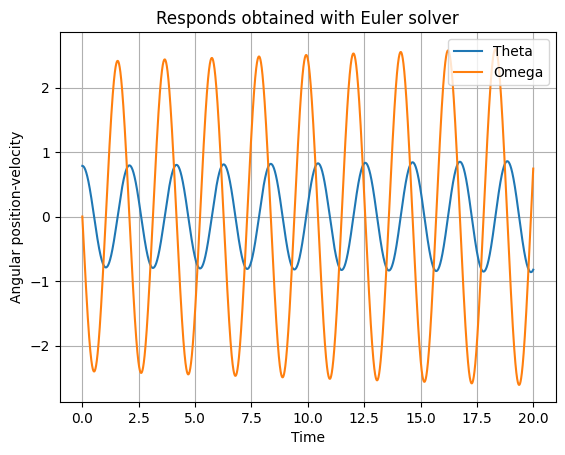

In [5]:
#---------------------------------------- Simulation loop-----------------------------------
# Newton-Raphson Method
for i in range(1, len(t_sim)):
    x_sim[i] = x_sim[i-1] + dt * model_equations(x_sim[i-1], u[i-1])
    #print(x_sim[i])

# Plot the simulation results
plt.figure()
plt.title("Responds obtained with Euler solver")
plt.plot(t_sim, x_sim[:, 0], label='Theta')  # Plot angle
plt.plot(t_sim, x_sim[:, 1], label='Omega')  # Plot angular velocity
plt.xlabel('Time')
plt.ylabel('Angular position-velocity')
plt.legend()
plt.grid(True)
plt.show()

## Solving the system making use of RK4 solver

In [6]:
#Revisar esta implementación
x_RK = np.zeros((len(t_sim), len(x0)))  # fill solution vector  with zeros
x_RK[0] = x0                            # Initial conditions asigned to solution vector.
h=dt                                    # time step

for i in range(1, len(t_sim)):
   # k1=model_equationsh*(x_RK[i-1], u[i-1])
    #print(k1)
   # k2=h*model_equations(np.array([x_RK[i-1,0]+k1[1]*(h/2),  x_RK[i-1,1]+(h/2)]), u[i-1])
   # k3=model_equations(np.array([x_RK[i-1,0]+k2[1]*(h/2),  x_RK[i-1,1]+(h/2)]), u[i-1])
   # k4=model_equations(np.array([x_RK[i-1,0]+k3[1]*h,  x_RK[i-1,1]+h]), u[i-1])
   # x_RK[i]=x_RK[i-1]+(h/6)*(k1+2*k2+2*k3+k4);

    k1=h*model_equations(x_RK[i-1], u[i-1])
    k2=h*model_equations(x_RK[i-1]+k1*(1/2), u[i-1])
    k3=h*model_equations(x_RK[i-1]+k1*(1/2), u[i-1])
    k4=h*model_equations(x_RK[i-1]+k3, u[i-1])
    x_RK[i]=x_RK[i-1]+(1/6)*(k1+2*k2+2*k3+k4);

## Comparison Euler vs RK4


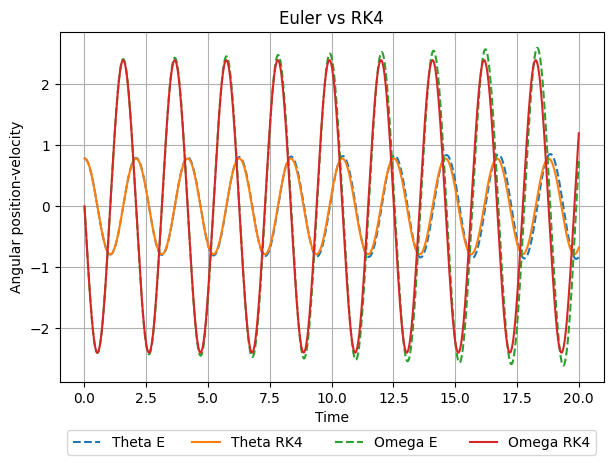

In [7]:
# plot the comparison
plt.figure()
plt.plot(t_sim, x_sim[:, 0],'--', label='Theta E')  # Plot angle NR
plt.plot(t_sim, x_RK[:, 0], label='Theta RK4 ')  # Plot angle RK4
plt.plot(t_sim, x_sim[:, 1],'--',label='Omega E ')  # Plot angular velocity NR
plt.plot(t_sim, x_RK[:, 1], label='Omega RK4')  # Plot angular velocity NR
plt.xlabel('Time')
plt.ylabel('Angular position-velocity')
plt.title('Euler vs RK4')
#plt.legend(loc="lower left")
#plt.legend(loc="upper right", frameon=False)
#plt.legend()
plt.legend(ncol=4,bbox_to_anchor=(0.5, -0.23), loc='lower center')
plt.tight_layout()
plt.grid(True)
plt.show() 

## Solving the system making use of RKDP solver

In [8]:
x_simDP = np.zeros((len(t_sim), len(x0)))  # fill solution vector  with zeros
x_simDP[0] = x0    

In [9]:
for i in range(1, len(t_sim)):
    k1=h*model_equations(x_simDP[i-1], u[i-1])
    k2=h*model_equations(x_simDP[i-1]+ (k1/5), u[i-1])
    k3=h*model_equations(x_simDP[i-1]+ (3/40)*k1 + (9/40)*k2, u[i-1])
    k4=h*model_equations(x_simDP[i-1]+ (44/45)*k1 - (56/15)*k2 + (32/9)*k3, u[i-1])
    k5=h*model_equations(x_simDP[i-1]+ (19372/6561)*k1 - (25360/2187)*k2 +(64448/6561)*k3 - (212/729)*k4, u[i-1])
    k6=h*model_equations(x_simDP[i-1]+ (9017/3168)*k1 -(355/33)*k2 +(46732/5247)*k3 + (49/176)*k4 - (5103/18656)*k5, u[i-1])
    k7=h*model_equations(x_simDP[i-1]+ (35/384)*k1 +(500/1113)*k3 +(125/192)*k4 -(2187/6784)*k5 + (11/84)*k6, u[i-1])

    x_simDP[i]=x_simDP[i-1]+ (35/384)*k1 + (500/1113)*k3 +(125/192)*k4 -(2187/6784)*k5 +(11/84)*k6

pDP=x_simDP[:,0]
vDP=x_simDP[:,1]

# Solving the system making use of Odeint solver from Python 

In [10]:
#Import libreries
import numpy as np
import scipy as spp
from scipy.integrate import odeint
from scipy.integrate import solve_ivp

# Define the model equations or system dynamics
def model_p(x,S):          #We have been eliminated the input u. Yet not known the way for introduce the signal control to the odeint
                       # u -> control input (torque)
    L = 1.0                  # Length of the pendulum arm
    g = 9.81                 # Acceleration due to gravity
    theta, theta_dot = S     # theta (angle)
       # theta_dot (angular velocity)

    theta_ddot = (-g / L) * np.sin(theta) # +1/L*u
    return [theta_dot, theta_ddot]

S_0 = (np.pi / 4, 0)   # Initial angle and angular velocity
t = np.linspace(0, 19.999, 20000)

In [11]:
t[1]

0.001

In [12]:
# Initial conditions

sol = odeint(model_p, y0=S_0, t=t, tfirst=True)

In [13]:
x_sol = sol.T[0]
v_sol = sol.T[1]

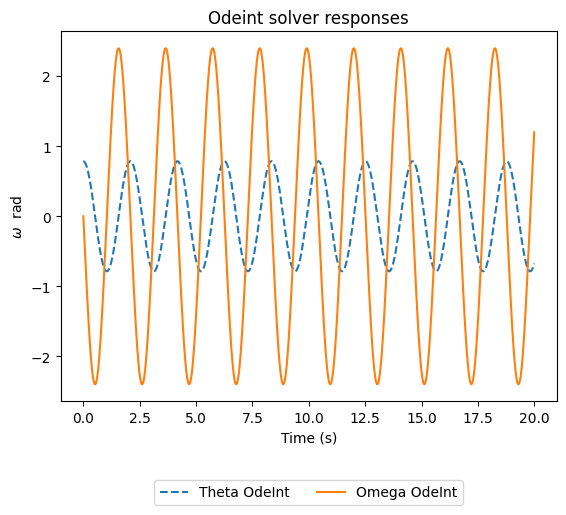

In [14]:
plt.plot(t, x_sol, '--', label='Theta OdeInt')
plt.plot(t, v_sol, label='Omega OdeInt')
plt.xlabel('Time (s)')
plt.ylabel( r"$\omega $  rad")
#plt.ylabel('Angular position-velocity')
plt.title('Odeint solver responses')
plt.legend(ncol=2,bbox_to_anchor=(0.5, -0.30), loc='lower center')
#plt.legend(loc='lower left')
plt.show()

# Solvers responses comparison

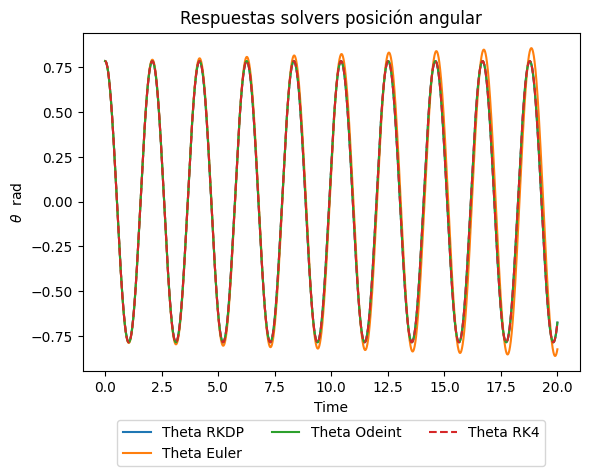

In [15]:
#Divide the graphs in two groups, Angular position and  Angular velocity.
#Graph Angular position
plt.figure(figsize=(6, 5))
plt.plot(t_sim, x_simDP[:, 0], label='Theta RKDP')
plt.plot(t_sim, x_sim[:, 0], label='Theta Euler')  
plt.plot(t, x_sol, label='Theta Odeint')
plt.plot(t_sim, x_RK[:, 0],'--', label='Theta RK4')  
plt.xlabel('Time')
plt.ylabel( r"$\theta $  rad")
#plt.ylabel('Angular position')
#plt.title('Angular position responses')
plt.title('Respuestas solvers posición angular')
plt.legend(ncol=3,bbox_to_anchor=(0.5, -0.30), loc='lower center')
plt.tight_layout()
#plt.grid(True)
plt.show()

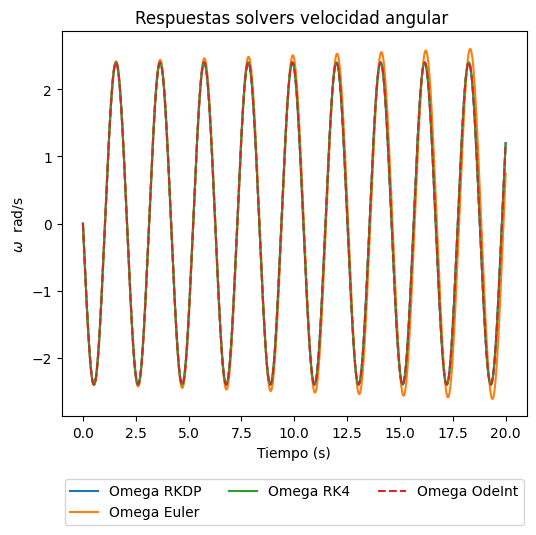

In [16]:
#Graph Angular velocity
plt.figure(figsize=(6, 5))
plt.plot(t_sim, x_simDP[:, 1],label='Omega RKDP')  # Plot angular velocity NR
plt.plot(t_sim, x_sim[:, 1],label='Omega Euler')  # Plot angular velocity NR
plt.plot(t_sim, x_RK[:, 1],label='Omega RK4')  # Plot angular velocity NR
plt.plot(t, v_sol,'--', label='Omega OdeInt')
plt.xlabel('Tiempo (s)')
plt.ylabel( r"$\omega $  rad/s")
#plt.title('Angular velocity responses')
plt.title('Respuestas solvers velocidad angular ')
plt.legend(ncol=3, bbox_to_anchor=(0.5, -0.30), loc='lower center')
#plt.tight_layout()
plt.show()

# Error comparison 

## As is shown below, the error percentage decrement if the Runge Kutta solver is used. But the error percentage is better if the Runge Kutta Dormand Prince is used.

In [17]:
#Percentual error position  
PepNR= abs((x_sim[:, 0]-x_sol)/ abs(x_sol))*100  # NR respect to OdeInt
PepRK=abs((x_RK[:, 0]-x_sol)/ abs(x_sol))*100    # RK respect to OdeInt
PepDP= abs((pDP-x_sol)/ abs(x_sol))*100     # DP respect to ODeInt

#Percentage error calculation RK4 respect to Odeint
VepNR= abs((x_sim[:, 1]-v_sol)/abs(v_sol))*100   # NR respect to OdeInt
VepRK=abs((x_RK[:, 1]-v_sol)/ abs(v_sol))*100    # RK respect to OdeInt
VepDP= abs((vDP-v_sol)/ abs(v_sol))*100           # DP respect to OdeInt


#Percentaje error calculation RKDP respect to Odeint



C:\Users\CARLOS_GR\AppData\Local\Temp\ipykernel_14092\3412199509.py:7: RuntimeWarning: invalid value encountered in divide
  VepNR= abs((x_sim[:, 1]-v_sol)/abs(v_sol))*100   # NR respect to OdeInt
C:\Users\CARLOS_GR\AppData\Local\Temp\ipykernel_14092\3412199509.py:8: RuntimeWarning: invalid value encountered in divide
  VepRK=abs((x_RK[:, 1]-v_sol)/ abs(v_sol))*100    # RK respect to OdeInt
C:\Users\CARLOS_GR\AppData\Local\Temp\ipykernel_14092\3412199509.py:9: RuntimeWarning: invalid value encountered in divide
  VepDP= abs((vDP-v_sol)/ abs(v_sol))*100           # DP respect to OdeInt


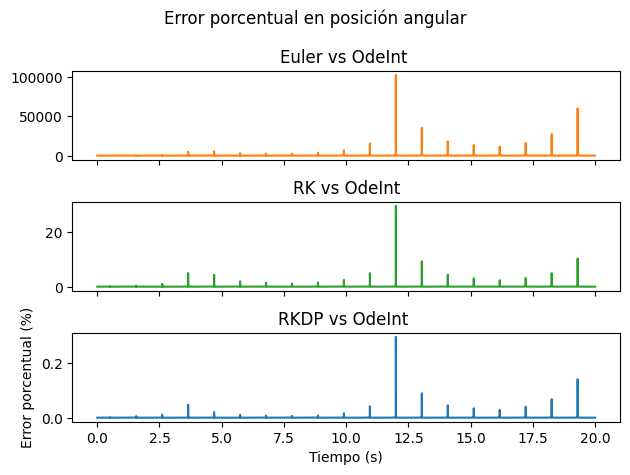

In [18]:
# Angular position percentage error plot
fig, (a1, a2, a3) = plt.subplots(3,sharex=True)
fig.suptitle('Error porcentual en posición angular')
a1.plot(t_sim, PepNR,'tab:orange')
a1.set_title("Euler vs OdeInt ")
a2.plot(t_sim, PepRK, 'tab:green')
a2.set_title("RK vs OdeInt")
a3.plot(t_sim, PepDP, 'tab:blue')
a3.set_title("RKDP vs OdeInt ")

plt.ylabel('Error porcentual (%)')
plt.xlabel('Tiempo (s)')

fig.tight_layout()

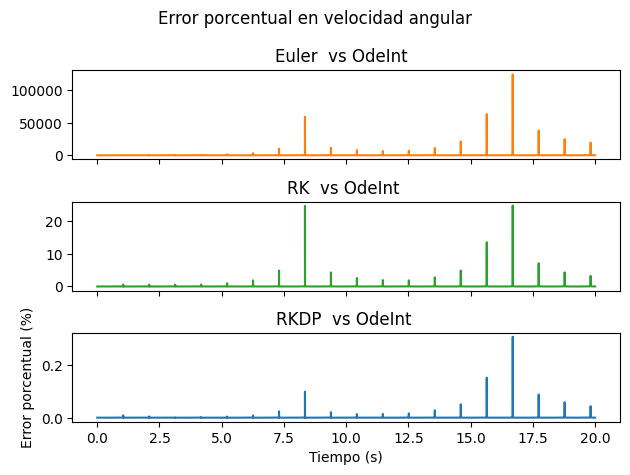

In [19]:
# Angular velocity percentage error plot
fig, (a1, a2, a3) = plt.subplots(3,sharex=True)
fig.suptitle('Error porcentual en velocidad angular')
a1.plot(t_sim, VepNR,'tab:orange')
a1.set_title("Euler  vs OdeInt  ")
a2.plot(t_sim, VepRK, 'tab:green')
a2.set_title("RK  vs OdeInt ")
a3.plot(t_sim, VepDP, 'tab:blue')
a3.set_title("RKDP  vs OdeInt ")
plt.ylabel('Error porcentual (%)')
plt.xlabel('Tiempo (s)')

fig.tight_layout()